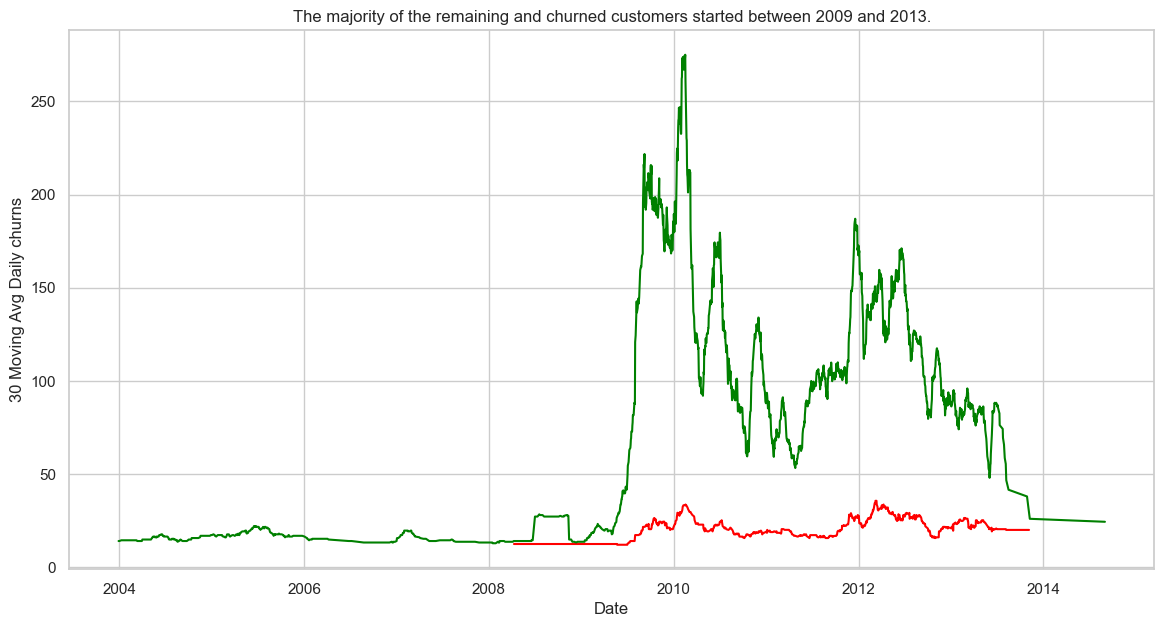

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
client_df = pd.read_csv('client_data.csv')
price_df = pd.read_csv('price_data.csv')

df = client_df.merge(price_df, on='id')
df['date_activ']= pd.to_datetime(df['date_activ'])

churn_per_day = df[df['churn'] == 1].groupby('date_activ').size().reset_index(name='churn_count')
non_churn_per_day = df[df['churn'] == 0].groupby('date_activ').size().reset_index(name='n_churn_count')

# Calculate 30-period moving average
churn_per_day['churn_avg'] = churn_per_day['churn_count'].rolling(window=30).mean()
non_churn_per_day['non_churn_avg'] = non_churn_per_day['n_churn_count'].rolling(window=30).mean()

# Plot
plt.figure(figsize=(14, 7))
plt.plot(churn_per_day['date_activ'], churn_per_day['churn_avg'], color='red')
plt.plot(non_churn_per_day['date_activ'],non_churn_per_day['non_churn_avg'], color='green')
#plt.scatter(non_churn_per_day['date_activ'], non_churn_per_day['n_churn_count'], color='blue')
plt.xlabel('Date')
plt.ylabel('30 Moving Avg Daily churns')
plt.title("The majority of the remaining and churned customers started between 2009 and 2013.")
plt.grid(True)
plt.show()

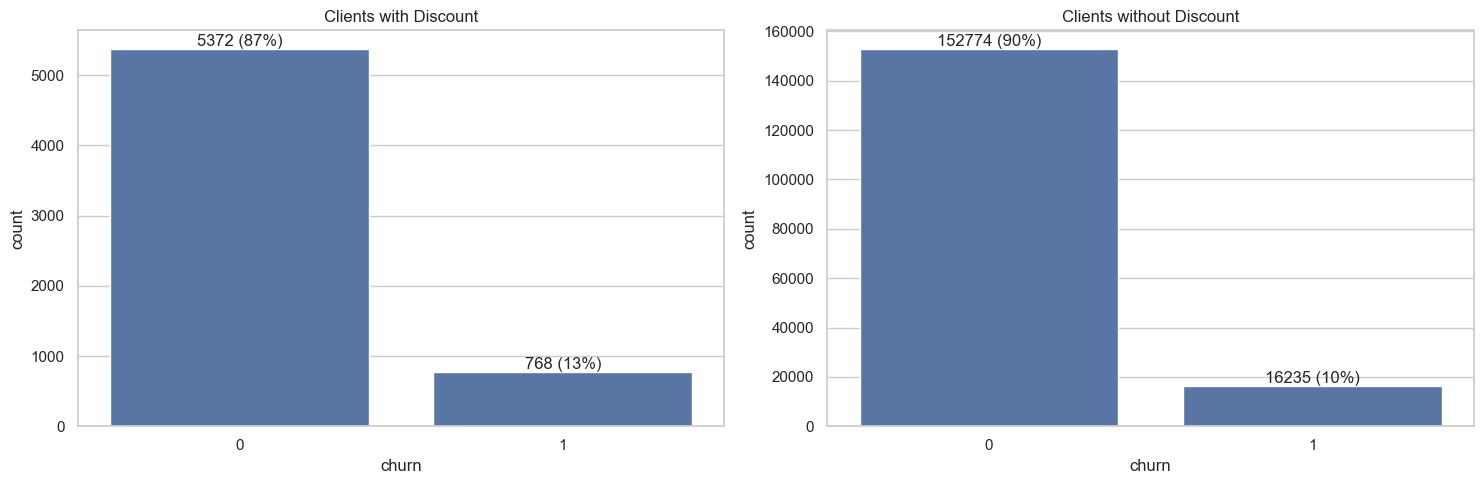

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Funzione per calcolare conteggi e etichette
def get_counts_labels(df, discount_status):
    churn_counts = df.churn.value_counts(ascending=False)
    rel_counts = df.churn.value_counts(ascending=False, normalize=True) * 100
    labels = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(churn_counts, rel_counts)]
    return churn_counts, labels

# Filtra i dati per clienti con e senza sconto
clients_with_discount = df[df.forecast_discount_energy != 0]
clients_without_discount = df[df.forecast_discount_energy == 0]

# Ottieni conteggi e etichette
abs_values_d, dlbls = get_counts_labels(clients_with_discount, 'with')
abs_values_wd, wdlbls = get_counts_labels(clients_without_discount, 'without')

# Crea il grafico
plt.figure(figsize=(15, 5))

# Grafico per clienti con sconto
plt.subplot(121)
ax1 = sns.countplot(x='churn', data=clients_with_discount)
ax1.bar_label(container=ax1.containers[0], labels=dlbls)
plt.title('Clients with Discount')

# Grafico per clienti senza sconto
plt.subplot(122)
ax2 = sns.countplot(x='churn', data=clients_without_discount)
ax2.bar_label(container=ax2.containers[0], labels=wdlbls)
plt.title('Clients without Discount')

plt.tight_layout()  # Migliora il layout
plt.show()


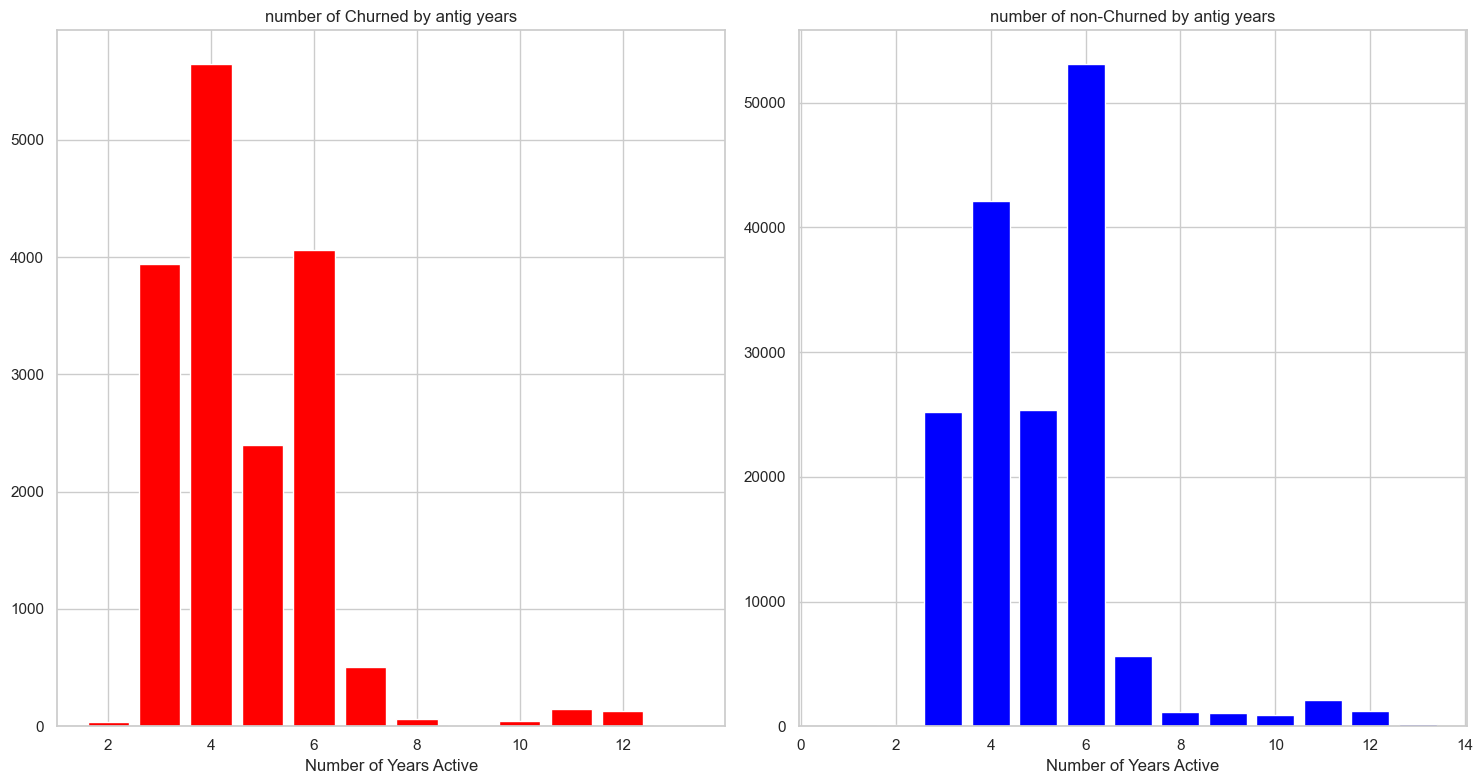

In [34]:
df_antig1 = df[df['churn'] == 1].groupby('num_years_antig')['churn'].count().reset_index(name='churn')
df_antig0 = df[df['churn'] == 0].groupby('num_years_antig')['churn'].count().reset_index(name='churn')
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
# Crea un grafico a dispersione
plt.bar(df_antig1['num_years_antig'], df_antig1['churn'], color='red')

plt.xlabel('Number of Years Active')  # Aggiungi un'etichetta per l'asse X
plt.title('number of Churned by antig years') # Aggiungi un titolo al grafico
plt.grid(True) 

plt.subplot(1,2,2)
plt.bar(df_antig0['num_years_antig'], df_antig0['churn'], color='blue')
plt.grid(True) 
plt.title('number of non-Churned by antig years')
plt.xlabel('Number of Years Active') 
plt.tight_layout()                      # Aggiungi una griglia per la leggibilità
plt.show()

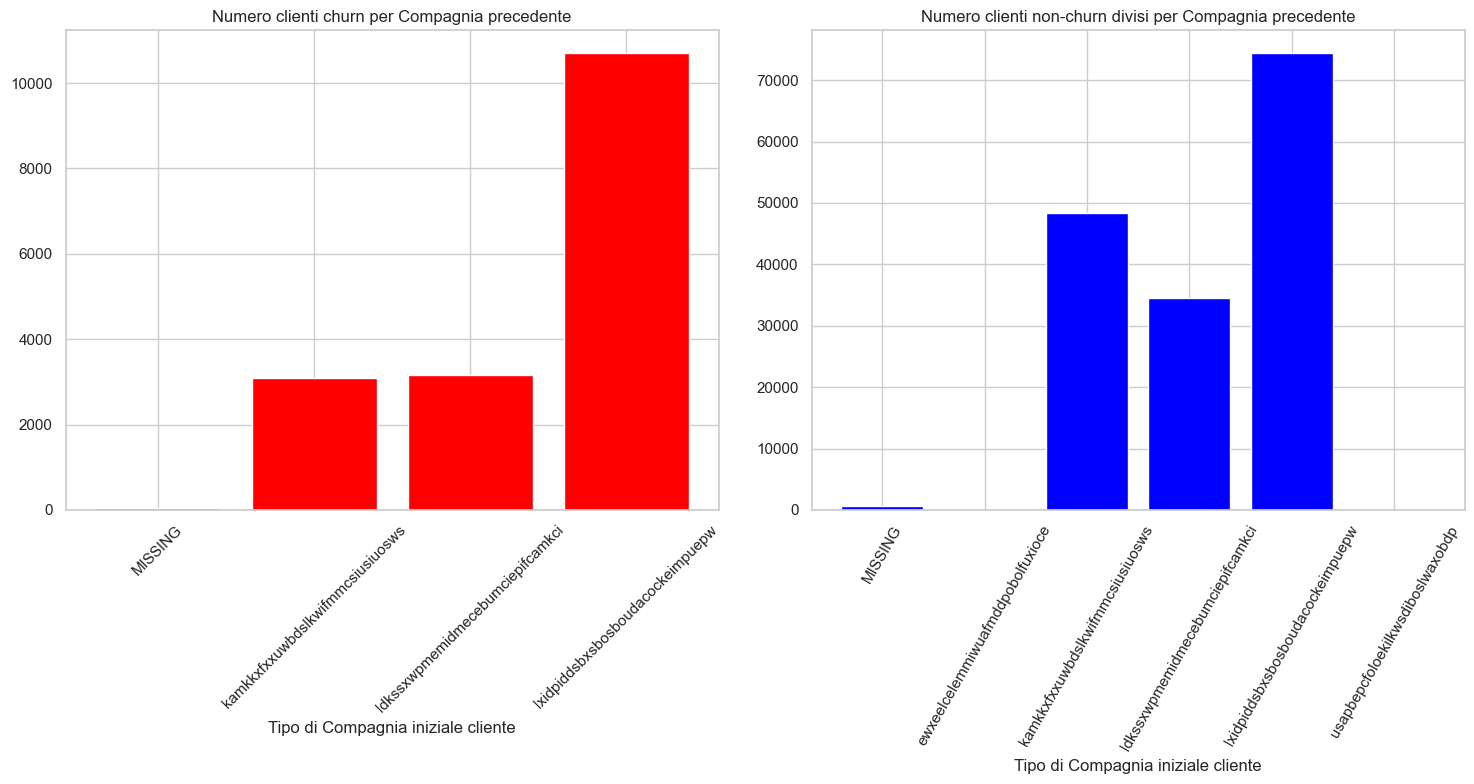

In [35]:
df_antig1 = df[df['churn'] == 1].groupby('origin_up')['churn'].count().reset_index(name='churn')
df_antig0 = df[df['churn'] == 0].groupby('origin_up')['churn'].count().reset_index(name='churn')
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
# Crea un grafico a dispersione
plt.bar(df_antig1['origin_up'], df_antig1['churn'], color='red')
plt.xticks(rotation=45)

plt.xlabel('Tipo di Compagnia iniziale cliente')  # Aggiungi un'etichetta per l'asse X
plt.title('Numero clienti churn per Compagnia precedente') # Aggiungi un titolo al grafico
plt.grid(True) 

plt.subplot(1,2,2)
plt.bar(df_antig0['origin_up'], df_antig0['churn'], color='blue')
plt.grid(True) 
plt.title('Numero clienti non-churn divisi per Compagnia precedente')
plt.xlabel('Tipo di Compagnia iniziale cliente') 
plt.xticks(rotation=60)
plt.tight_layout()                      # Aggiungi una griglia per la leggibilità
plt.show()

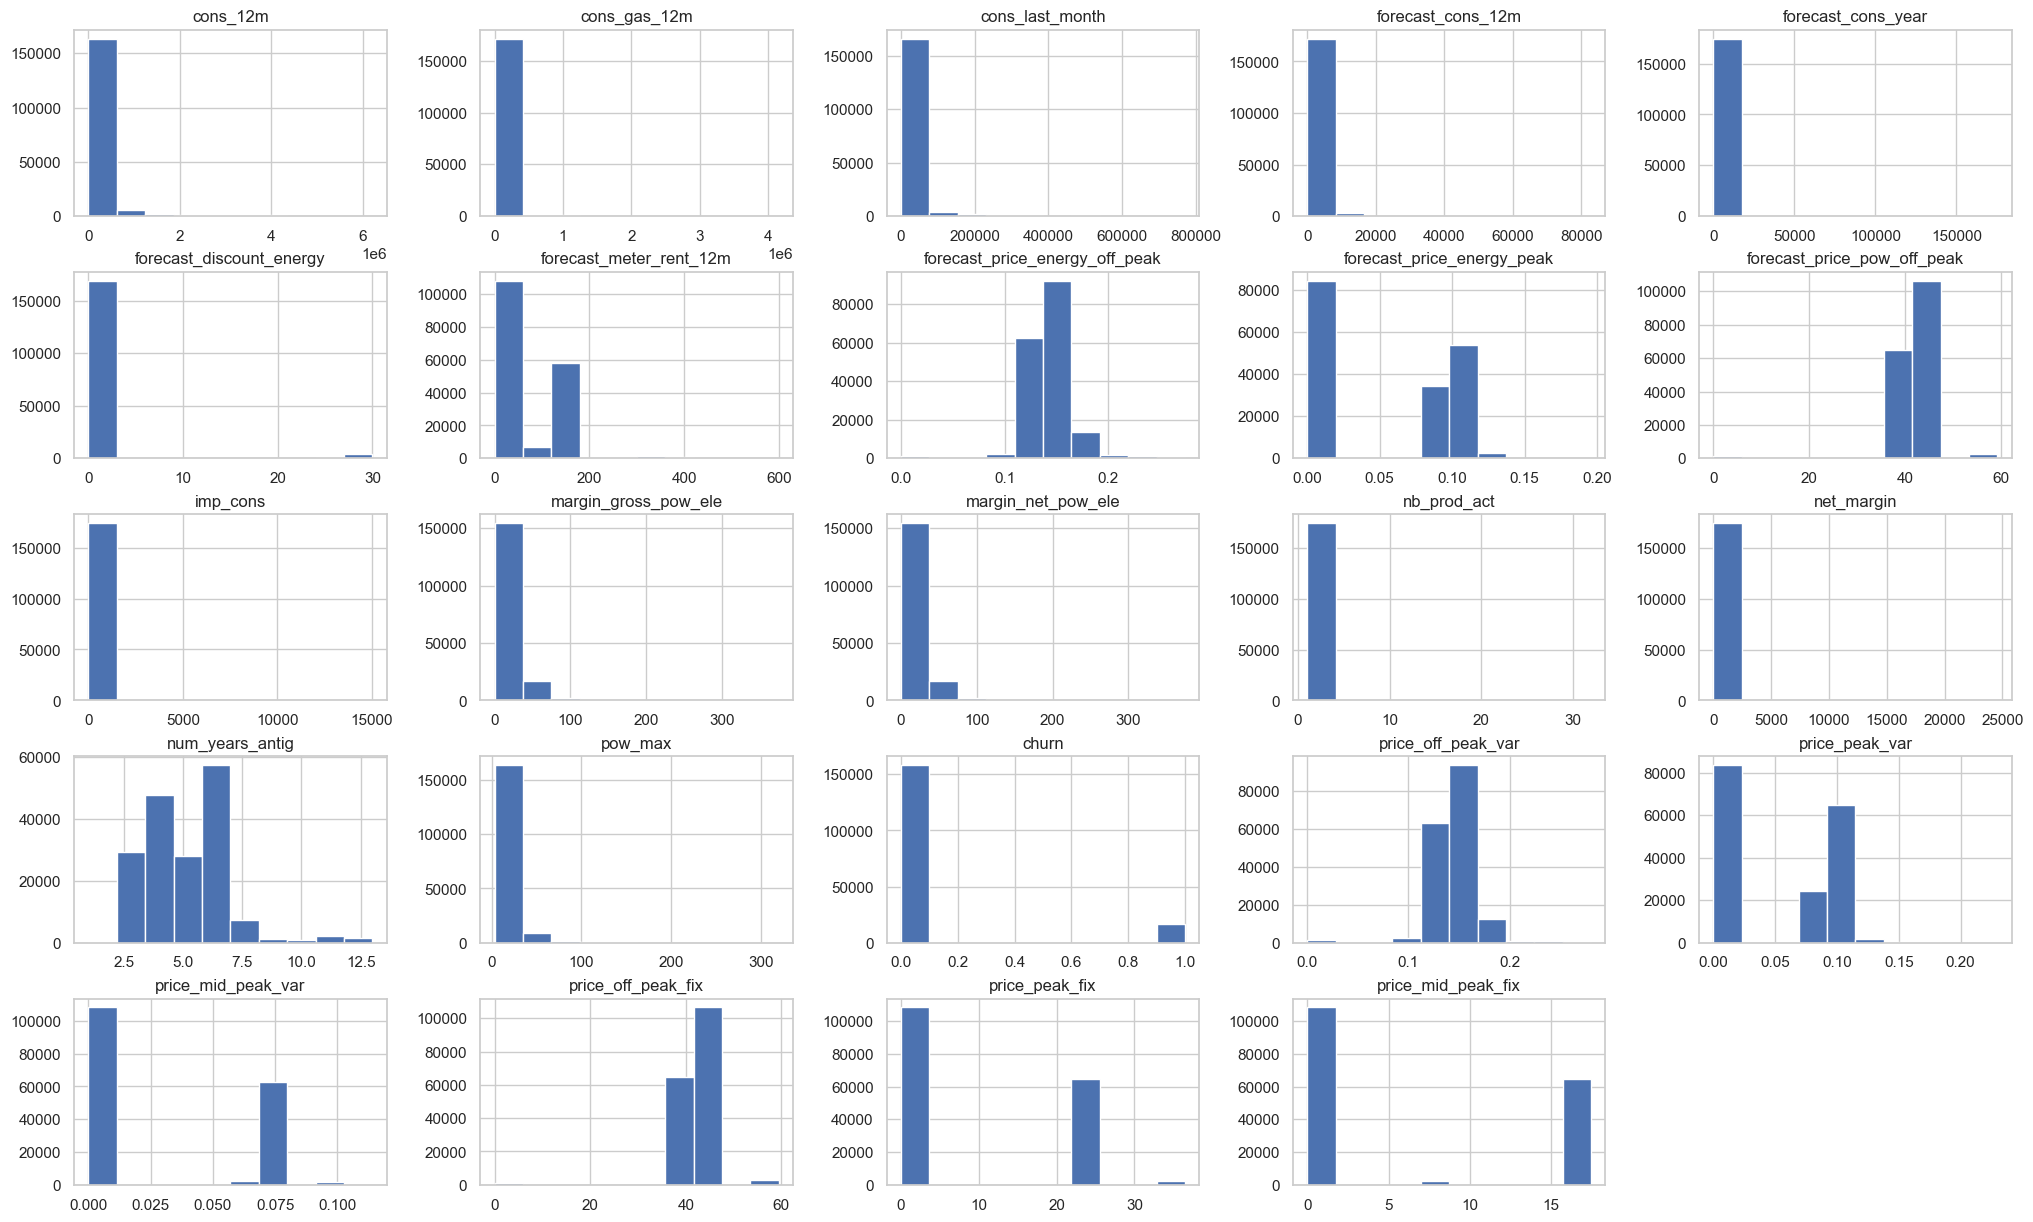

In [36]:
df.groupby(['id','price_date']).mean(numeric_only=True).hist(figsize=(25,15))
plt.show()

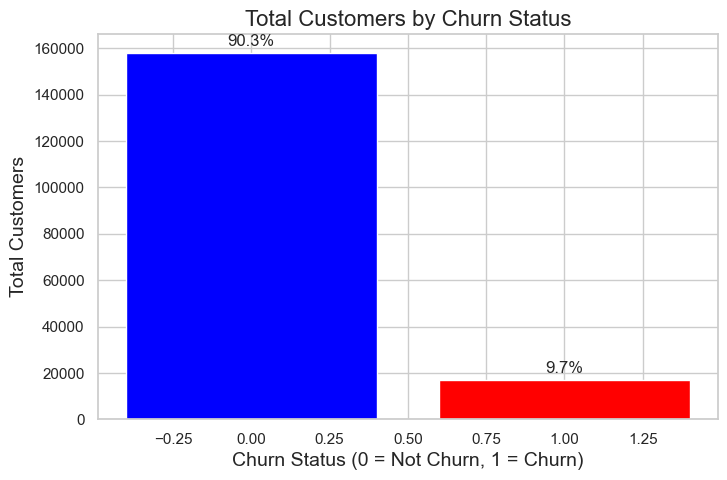

In [37]:
churn_counts = df['churn'].value_counts()

# Calcola le percentuali
churn_percentages = churn_counts / churn_counts.sum() * 100

# Crea il grafico a barre
plt.figure(figsize=(8, 5))
bars = plt.bar(churn_counts.index, churn_counts.values, color=['blue', 'red'])

# Aggiungi percentuali sopra le barre usando bar_label
plt.bar_label(bars, labels=[f'{p:.1f}%' for p in churn_percentages], padding=3)

# Aggiungi estetica
plt.title('Total Customers by Churn Status', fontsize=16)
plt.xlabel('Churn Status (0 = Not Churn, 1 = Churn)', fontsize=14)
plt.ylabel('Total Customers', fontsize=14)
plt.xticks(rotation=0)  # Rotazione degli x-ticks

# Mostra il grafico
plt.show()


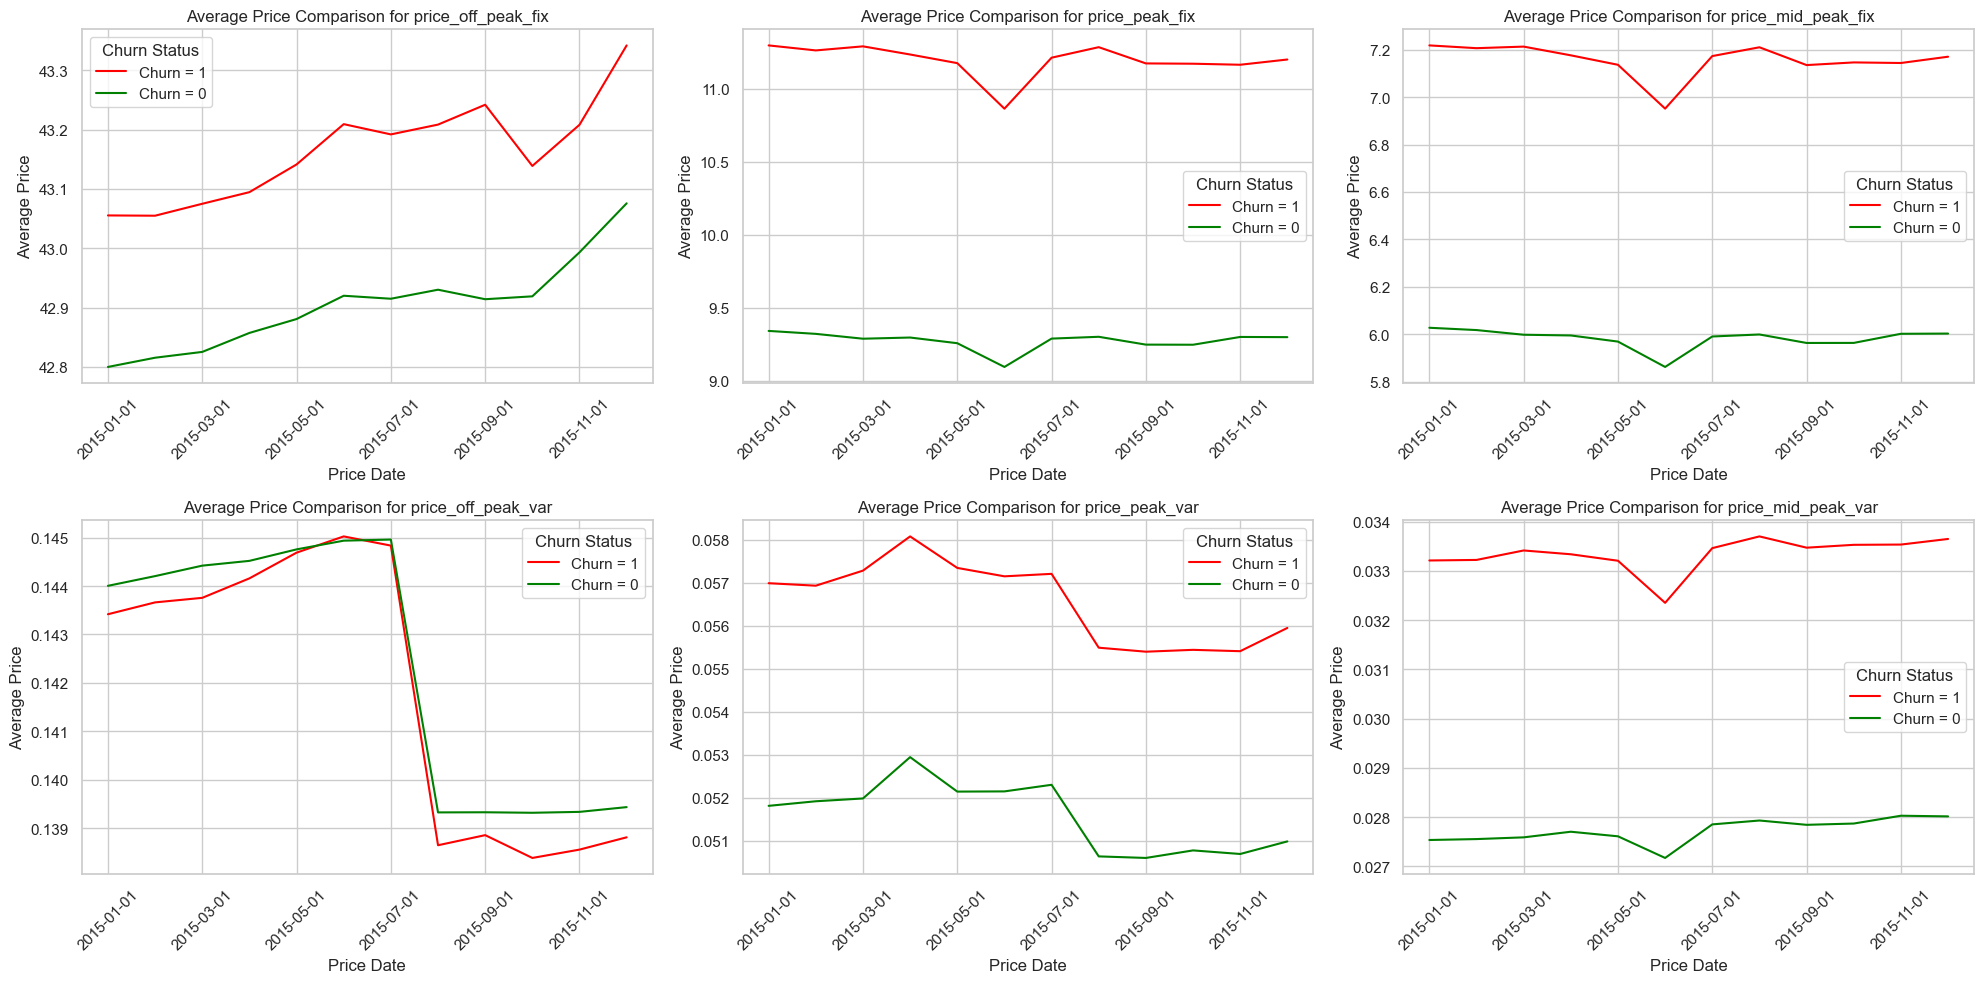

In [38]:


# Esempio di colonne di prezzo
price_columns = ['price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix',
                 'price_off_peak_var', 'price_peak_var', 'price_mid_peak_var']

# Imposta il numero di righe e colonne per il subplot
num_cols = 3  # Numero di colonne nel subplot
num_rows = (len(price_columns) + num_cols - 1) // num_cols  # Calcola il numero di righe

plt.figure(figsize=(20, num_rows * 5))  # Dimensioni della figura

for i, column in enumerate(price_columns):
    plt.subplot(num_rows, num_cols, i + 1)  # Crea un subplot per ciascun tipo di prezzo
    
    # Raggruppa i dati per i clienti churn e non churn
    churn_grp_price = df[df['churn'] == 1].groupby('price_date')[column].mean(numeric_only=True)
    non_churn_grp_price = df[df['churn'] == 0].groupby('price_date')[column].mean(numeric_only=True)

    # Crea il grafico a linee
    churn_grp_price.plot(label='Churn = 1', color='red', legend=True)
    non_churn_grp_price.plot(label='Churn = 0', color='green', legend=True)
    
    plt.title(f'Average Price Comparison for {column}')
    plt.xlabel('Price Date')
    plt.ylabel('Average Price')
    plt.xticks(rotation=45)
    plt.legend(title='Churn Status')

plt.tight_layout()  # Migliora il layout per evitare sovrapposizioni
plt.show()



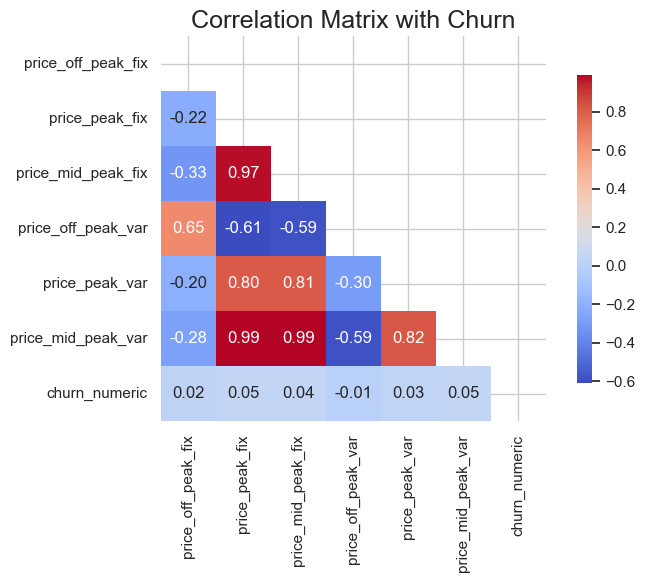

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Supponiamo che df sia il tuo DataFrame già definito

# Creiamo una nuova colonna per il churn come variabile numerica (1 per churn e 0 per non churn)
df['churn_numeric'] = df['churn'].astype(int)

# Selezioniamo solo le colonne di prezzo e la colonna churn
price_columns = ['price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix',
                 'price_off_peak_var', 'price_peak_var', 'price_mid_peak_var', 'churn_numeric']

correlation_matrix = df[price_columns].corr()

# Imposta il tema di Seaborn
sns.set_theme(style="whitegrid")

# Creare una maschera per la matrice di correlazione
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Creare la heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', square=True, cbar_kws={"shrink": .8}, fmt=".2f")

plt.title('Correlation Matrix with Churn', fontsize=18)
plt.show()


In [40]:
df.drop([
    #Highly correlated columns
    'cons_last_month','forecast_cons_12m', 'forecast_cons_year','forecast_meter_rent_12m',
    'forecast_meter_rent_12m', 'forecast_price_energy_off_peak','forecast_price_energy_peak', 
    'forecast_price_pow_off_peak','margin_gross_pow_ele', 'nb_prod_act',
    'num_years_antig',
    #Unwanted Columns
    'id','date_activ','date_end','date_renewal','date_modif_prod'],axis=1,inplace=True)

In [41]:
#df.describe()

df.drop_duplicates(subset=['cons_12m',
       'imp_cons', 'net_margin',
       'pow_max', 'churn', 'price_off_peak_fix', 'price_mid_peak_fix'
       ],ignore_index=True,inplace=True)

In [42]:
df =  pd.get_dummies(df,drop_first=True)
x,y = df.drop('churn',axis=1),df.churn
df.describe()

,cons_12m,cons_gas_12m,forecast_discount_energy,imp_cons,margin_net_pow_ele,net_margin,pow_max,churn,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,churn_numeric
count,3.576100e+04,3.576100e+04,35761.000000,35761.000000,35761.000000,35761.000000,35761.000000,35761.000000,35761.000000,35761.000000,35761.000000,35761.000000,35761.000000,35761.000000,35761.000000
mean,1.546182e+05,2.680447e+04,1.095467,148.999731,23.970070,183.100001,17.690626,0.096586,0.144938,0.052004,0.026543,43.104701,8.851789,5.766132,0.096586
std,5.619621e+05,1.559505e+05,5.446691,336.757882,19.937853,324.578177,12.608118,0.295397,0.021180,0.050382,0.035542,3.672124,11.895227,7.749828,0.295397
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.530000e+03,0.000000e+00,0.000000,0.000000,13.680000,49.190000,12.500000,0.000000,0.127710,0.000000,0.000000,40.728885,0.000000,0.000000,0.000000
50%,1.347300e+04,0.000000e+00,0.000000,34.460000,21.110000,108.270000,13.856000,0.000000,0.148477,0.084213,0.000000,44.266930,0.000000,0.000000,0.000000
75%,3.909000e+04,0.000000e+00,0.000000,184.400000,28.840000,228.850000,17.321000,0.000000,0.152445,0.103395,0.071814,44.266931,24.339581,16.226389,0.000000
max,6.207104e+06,4.154590e+06,30.000000,15042.790000,374.640000,24570.650000,320.000000,1.000000,0.280700,0.229298,0.114102,59.444710,36.490689,17.458221,1.000000


In [46]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1. Bilanciamento del dataset
oversample = RandomOverSampler(sampling_strategy=0.5)
x_s, y_s = oversample.fit_resample(x, y)

undersample = RandomUnderSampler(sampling_strategy='majority')
x_s, y_s = undersample.fit_resample(x_s, y_s)

# 2. Suddivisione del dataset (opzionale prima della standardizzazione)
x_train, x_test, y_train, y_test = train_test_split(x_s, y_s, test_size=0.27, stratify=y_s, random_state=42)

# 3. Standardizzazione del dataset
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# 4. PCA
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

# Creazione del DataFrame con i risultati PCA e il target 'churn'
pca_df_train = pd.DataFrame(x_train_pca, columns=['PCA1', 'PCA2'])
pca_df_train['churn'] = y_train

pca_df_test = pd.DataFrame(x_test_pca, columns=['PCA1', 'PCA2'])
pca_df_test['churn'] = y_test

# Visualizza i primi risultati
pca_df_train.head()


,PCA1,PCA2,churn
0,-2.081771,0.070517,NaN
1,-1.951122,1.360604,1.0
2,-1.211373,-2.014228,1.0
3,-1.740955,-1.838858,1.0
4,2.976663,-1.280252,NaN


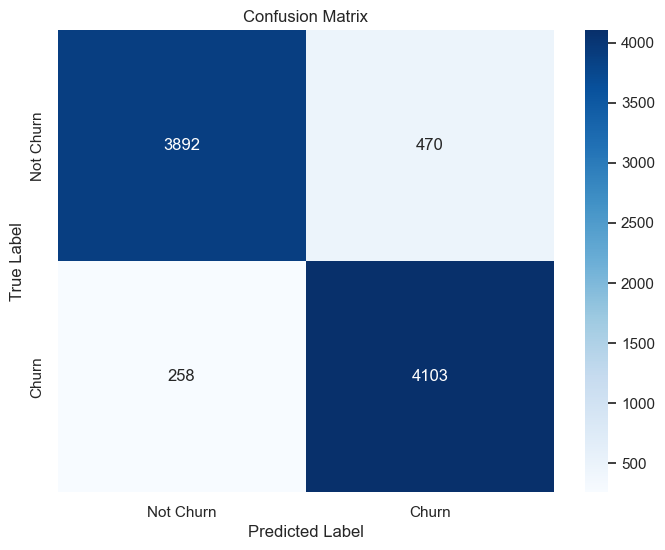

Accuracy: 0.9165424739195231
              precision    recall  f1-score   support

           0       0.94      0.89      0.91      4362
           1       0.90      0.94      0.92      4361

    accuracy                           0.92      8723
   macro avg       0.92      0.92      0.92      8723
weighted avg       0.92      0.92      0.92      8723



In [49]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score,classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler,QuantileTransformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score,classification_report, accuracy_score

# Creazione del modello Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(x_train_pca, y_train)

# Previsione sui dati di test
y_pred = model.predict(x_test_pca)

# Matrice di confusione
cm = confusion_matrix(y_test, y_pred)

# Visualizzazione della matrice di confusione come heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Ulteriori metriche di valutazione
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

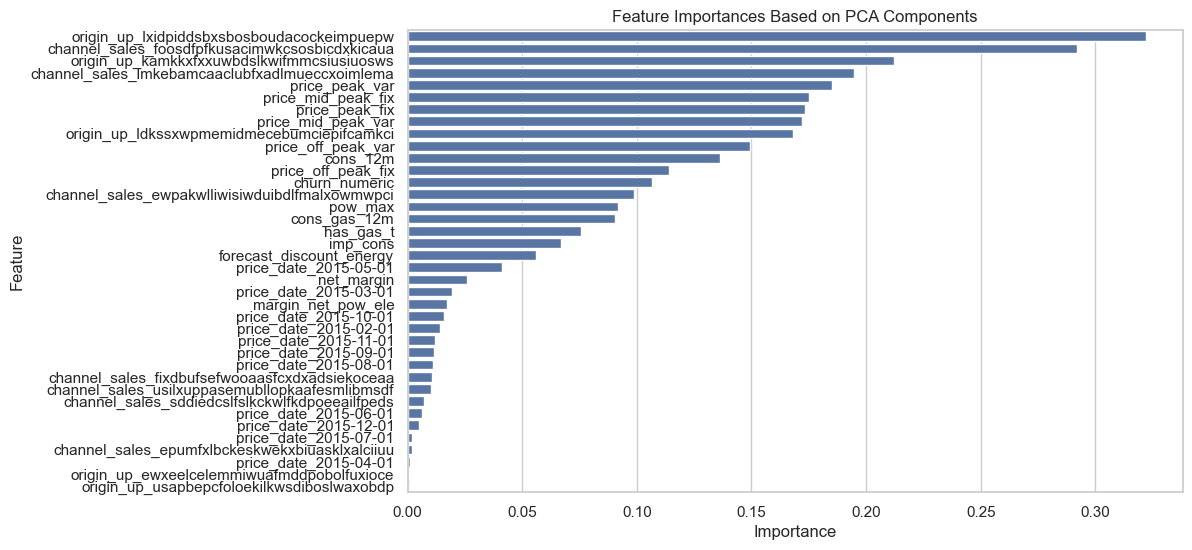

In [55]:
importances = model.feature_importances_

# Calcola l'importanza delle feature originali
# Le colonne di x devono essere le stesse della PCA
components_df = pd.DataFrame(pca.components_, columns=x.columns, index=['PCA1', 'PCA2'])
importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': (components_df.loc['PCA1'] * importances[0] + components_df.loc['PCA2'] * importances[1]).abs()
}).sort_values(by='Importance', ascending=False)

# Visualizza le importanze delle feature originali
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances Based on PCA Components')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Naive Bayes:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8723
           1       1.00      1.00      1.00       933

    accuracy                           1.00      9656
   macro avg       1.00      1.00      1.00      9656
weighted avg       1.00      1.00      1.00      9656

KNN:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      8723
           1       1.00      0.94      0.97       933

    accuracy                           0.99      9656
   macro avg       1.00      0.97      0.98      9656
weighted avg       0.99      0.99      0.99      9656

SVM:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8723
           1       1.00      1.00      1.00       933

    accuracy                           1.00      9656
   macro avg       1.00      1.00      1.00      9656
weighted avg       1.00      1.00      1.00      96

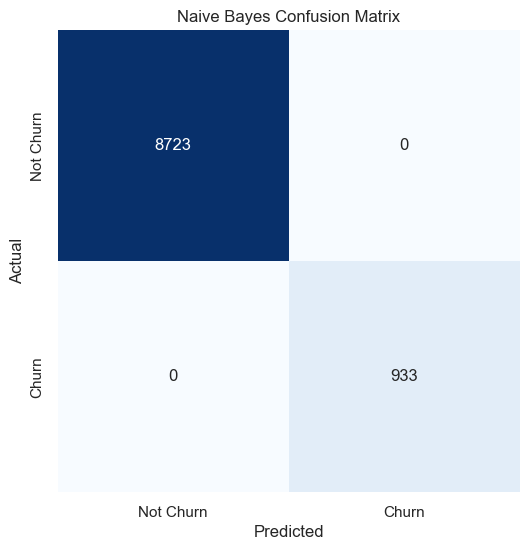

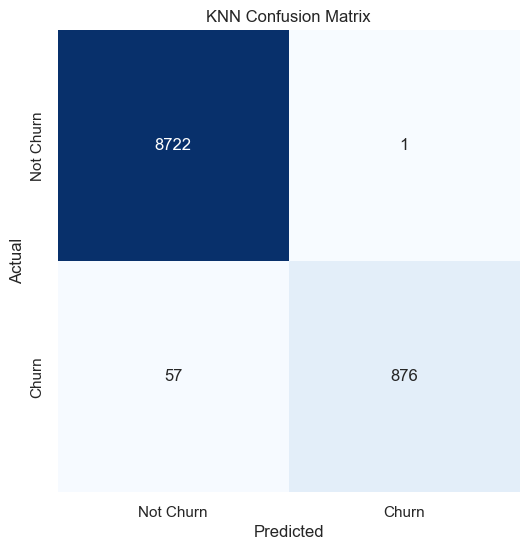

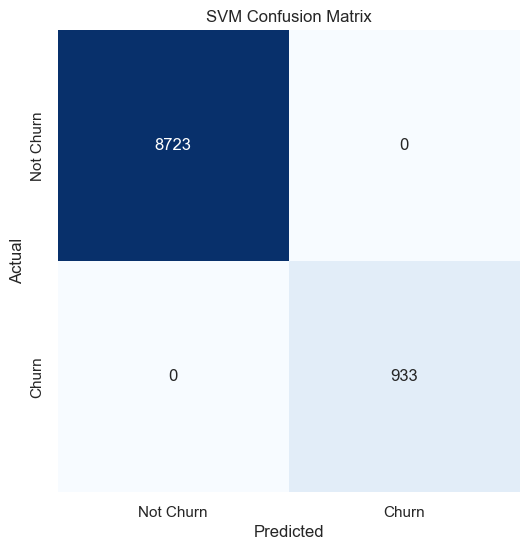

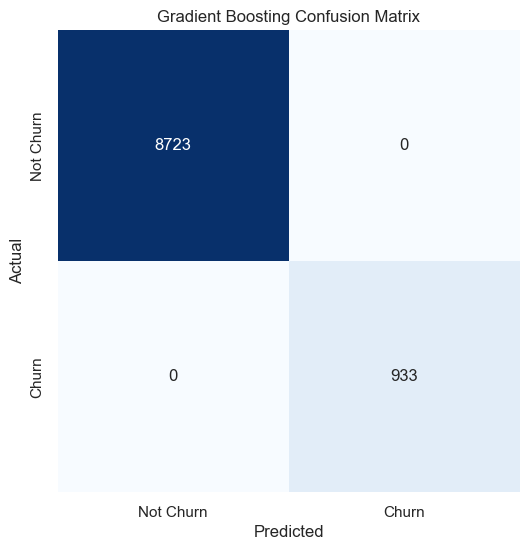

In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


# Prepara i dati
x = df.drop('churn', axis=1)
y = df['churn']

# Suddividi i dati in set di addestramento e test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.27, stratify=y, random_state=42)

# Standardizza i dati
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# 1. Naive Bayes
nb_model = GaussianNB()
nb_model.fit(x_train_scaled, y_train)
nb_predictions = nb_model.predict(x_test_scaled)

print("Naive Bayes:")
print(classification_report(y_test, nb_predictions))

# 2. K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train_scaled, y_train)
knn_predictions = knn_model.predict(x_test_scaled)

print("KNN:")
print(classification_report(y_test, knn_predictions))

# 3. Support Vector Machine
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(x_train_scaled, y_train)
svm_predictions = svm_model.predict(x_test_scaled)

print("SVM:")
print(classification_report(y_test, svm_predictions))

# 4. Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(x_train, y_train)  # Note: non standardizziamo i dati qui
gb_predictions = gb_model.predict(x_test)

print("Gradient Boosting:")
print(classification_report(y_test, gb_predictions))

# Funzione per visualizzare la matrice di confusione
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', square=True, cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.xticks(ticks=[0.5, 1.5], labels=['Not Churn', 'Churn'])
    plt.yticks(ticks=[0.5, 1.5], labels=['Not Churn', 'Churn'])
    plt.show()

# Visualizza le matrici di confusione
plot_confusion_matrix(y_test, nb_predictions, title='Naive Bayes Confusion Matrix')
plot_confusion_matrix(y_test, knn_predictions, title='KNN Confusion Matrix')
plot_confusion_matrix(y_test, svm_predictions, title='SVM Confusion Matrix')
plot_confusion_matrix(y_test, gb_predictions, title='Gradient Boosting Confusion Matrix')
